In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
16859,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


In [5]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.tail()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5851,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5855,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937


In [7]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
22715,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


In [9]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


**Conclusiones Iniciales**
- Los datasets train y full tiene las mismas columnas.
- El dataset test tiene 34 columnas menos que los otros datasets. Necesitamos analizar que columnas hacen falta en este dataset.
- Tenemos valores ausentes en varias columnas. Necesitamos decidir qué hacer con ellos. 
- El dataset full contiene todos los datos de train y test. 

### Comprobacion del calculo de recuperacion

En esta sección vamos a comprobar que el cálculo de recuperación hecho esta correcto. Para esto vamos a hacer lo siguiente:

- Crear el numerador y denominador de nuestra formula de recuperación.
- Recrear la forumla de recuperación y calcular el EAM para saber si esta bien calculado. 

In [10]:
# Numerador para nuestros calculos
num = train['rougher.output.concentrate_au']*(train['rougher.input.feed_au']-train['rougher.output.tail_au'])

# Denominador para nuestros calculos
dem = train['rougher.input.feed_au']*(train['rougher.output.concentrate_au']-train['rougher.output.tail_au'])

# Calculamos el EAM entre nuestro calculo y los resultados
(train['rougher.output.recovery']- num/dem*100).abs().mean()

9.303415616264301e-15

**Conclusiones**

Con un EAM tan bajo podemos decir que los cálculos del dataset y nuestros cálculos no son tan diferentes y que los cálculos están bien hechos. 

### Duplicados

In [11]:
print(train['date'].duplicated().sum())
print(test['date'].duplicated().sum())
print(full['date'].duplicated().sum())

0
0
0


**Conclusiones**

Hemos utilizado la columna `date` para buscar valores duplicados. Ya que todo se registra por fechas y tiempo, hemos utilizado esta columna como indicador único. No hemos encontrado valores duplicados en ninguno de los datasets. 
### Valores Ausentes


In [12]:
full_columns = full.columns
missing_values_full = []
for column in full_columns: 
    if full[column].isna().any():
        missing_values_full.append(column)
missing_values_full

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.sta

In [13]:
len(missing_values_full)

85

In [14]:
'{:2%}'.format(1- len(full.dropna())/len(full))

'29.151259%'

**Conclusiones**

- Hemos analizado solo el dataset full ya que este tiene todas las columnas con los valores de los otros datasets.
- Ochenta y cinco de las 87 columnas tiene valores ausentes. 
- Si decidimos eliminar los valores ausentes de cada columna, perderemos casi el 30% de todos nuestros datos. 
- Ya que el eliminar nuestros datos ausentes es muy riesgoso, necesitamos encontrar una forma de remplazar estos datos. 

Ya que solo las columnas `primary_cleaner.input.feed_size` y `date` no tienen valores ausentes, analizaremos un poco más la columna `primary_cleaner.input.feed_size` para ver cómo se distribuyen los datos. 

In [15]:
full['primary_cleaner.input.feed_size'].describe()

count    22716.000000
mean         7.288872
std          0.617357
min          1.080000
25%          6.920000
50%          7.280000
75%          7.680000
max         15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

Al analizar el describe de esta columna podemos ver que los valores de la media y la mediana son casi exactos lo cual nos indica que están equilibrados. Sin embargo, esto no quiere decir que los valores en todas las columnas lo estén. 

Ya que tenemos demasiados valores ausentes y no podemos eliminarlos, y con el conocimiento de que nuestros datos son secuenciales y están ordenados por fechas, vamos a llenar todos los valores ausentes haciendo un forward fill. 


In [16]:
# Aplicamos el ffill a cada dataset. 

train_ffill = train.fillna(method='ffill')
test_ffill = test.fillna(method='ffill')
full_ffill = full.fillna(method='ffill')


**Que columnas tenemos en el conjunto de entrenamiento que no tenemos en el conjunto de prueba?**

In [17]:
test_missing_columns = list(set(train_ffill.columns) - set(test_ffill.columns))
test_missing_columns

['secondary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.recovery',
 'final.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_sol',
 'final.output.tail_au',
 'primary_cleaner.output.tail_au',
 'final.output.tail_sol',
 'final.output.concentrate

**Conclusiones**

Podemos observar que la mayoría de las columnas ausentes en nuestro dataset de prueba son aquellas columnas de output. Para este análisis solo necesitamos dos de estas columnas. Más adelante extraeremos estos datos desde nuestro dataset completo para poder crear nuestros modelos. 

## Analisis de datos

En esta sección vamos a analizar lo siguiente:
- Analizaremos como cambia a concentración de los metales (Au, Ag, Pb) después de cada etapa de purificación. 
- Compararemos las distribuciones del tamaño de las partículas de la alimentación en los conjuntos de entrenamiento y de prueba. Si es que estas varían significativamente, la evaluación del modelo no será correcta.
- Analizaremos las concentraciones totales de los metales por etapas. Responderemos a las siguientes preguntas:
    
    - ¿Se observa algún valor anormal en la distribución total?

    - Si es así, ¿Merece la pena eliminar estos valores de ambas muestras?


### Concentracion de metales por etapas

Para esta sección tomaremos la concentración de los metales de las siguientes etapas. 
-	Concentración de metales después de la flotación.
-	Concentración de los metales después de la primera limpieza.
-	Concentración de los metales después de la segunda limpieza. 


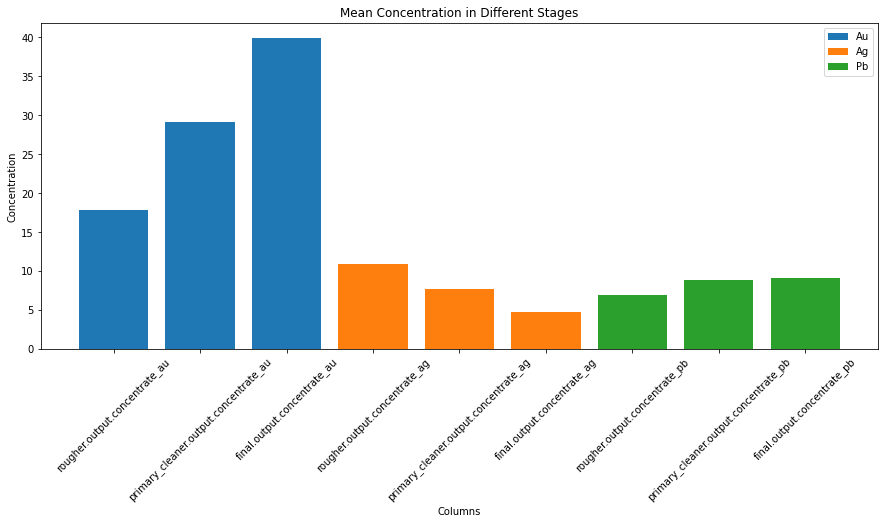

In [18]:
concentrate_au = full_ffill[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                        'final.output.concentrate_au']].mean()
concentrate_ag = full_ffill[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                        'final.output.concentrate_ag']].mean()
concentrate_pb = full_ffill[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                        'final.output.concentrate_pb']].mean()
au_columns = concentrate_au.index
ag_columns = concentrate_ag.index
pb_columns = concentrate_pb.index

plt.figure(figsize=(15, 6))


plt.bar(au_columns, concentrate_au, label='Au') 
plt.bar(ag_columns, concentrate_ag, label='Ag') 
plt.bar(pb_columns, concentrate_pb, label='Pb') 
plt.legend()
plt.xlabel('Columns')
plt.ylabel('Concentration')
plt.title('Mean Concentration in Different Stages')
plt.xticks(rotation=45)
plt.show()

**Conclusiones**

- Vemos que la concentración de aumenta a medida que pasa todos los procesos. 
- La cantidad de plata disminuye a medida que pasa los procesos.
- La cantidad de ploma también aumenta a medida que pasa cada proceso. 


### Analisis de distribuciones

En esta sección vamos a comparar la distribución del tamaño de las partículas de los conjuntos de entrenamiento y prueba. 

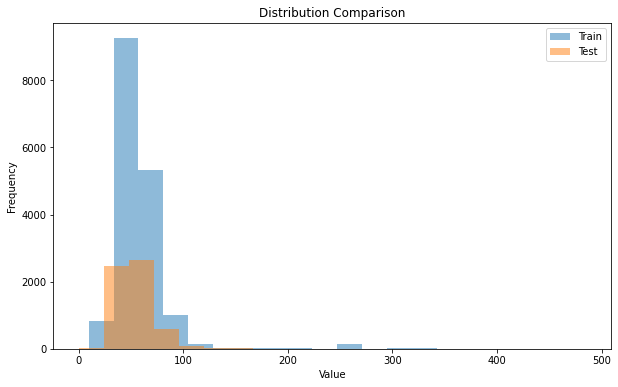

In [19]:
# Creamos un histograma para comparar la distribución de ambos datasets. 

plt.figure(figsize=(10, 6))


plt.hist(train_ffill['rougher.input.feed_size'], bins=20, alpha=0.5, label='Train')
plt.hist(test_ffill['rougher.input.feed_size'], bins=20, alpha=0.5, label='Test')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.show()

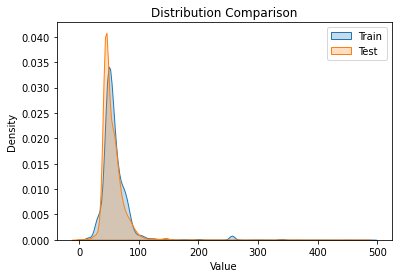

In [20]:
# Creamos un diagrama de densidad. 

sns.kdeplot(train_ffill['rougher.input.feed_size'], label='Train', shade=True)
sns.kdeplot(test_ffill['rougher.input.feed_size'], label='Test', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()
plt.show()

In [21]:
# Imprimimos un describe de cada columna. 

print(train_ffill['rougher.input.feed_size'].describe())
print('-------'*15)
    print(test_ffill['rougher.input.feed_size'].describe())

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64
---------------------------------------------------------------------------------------------------------
count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64


**Conclusiones**

En los gráficos podemos ver que son bastante similares las distribuciones de estas columnas en ambos datasets. Podemos ver que hay unas diferencias mínimas en el histograma y el diagrama de densidad. También al analizar el describe vemos a que la media y mediana de ambos datasets son bastante similares, pero varían un poco. Consideremos que la variabilidad es menor y que no es necesario hacer nada al respecto. 

### Concentracion total de substancias por estapas

En esta sección vamos a analizar las concentraciones totales de los metales por etapas. Para esto haremos lo siguiente:
- Sumaremos las concentraciones de los tres metales en cada etapa y así obtendremos columnas de la concentración total de metales por etapa. 
- Crearemos gráficos para poder analizarlos. 
- Responderemos las preguntas:

    - ¿Se observa algún valor anormal en la distribución total?
    
    - Si es así, ¿Merece la pena eliminar estos valores de ambas muestras?
    
- Tomaremos decisiones de acuerdo a nuestras respuestas a las preguntas.


In [22]:
train_ffill['rougher.input'] = (train_ffill['rougher.input.feed_au']
                                +train_ffill['rougher.input.feed_ag']
                                +train_ffill['rougher.input.feed_pb'])
                                
train_ffill['rougher.output'] = (train_ffill['rougher.output.concentrate_au'] 
                                +train_ffill['rougher.output.concentrate_ag']
                                +train_ffill['rougher.output.concentrate_pb'])
                                 
train_ffill['final.output'] = (train_ffill['final.output.concentrate_au']
                              +train_ffill['final.output.concentrate_ag']
                              +train_ffill['final.output.concentrate_pb'])

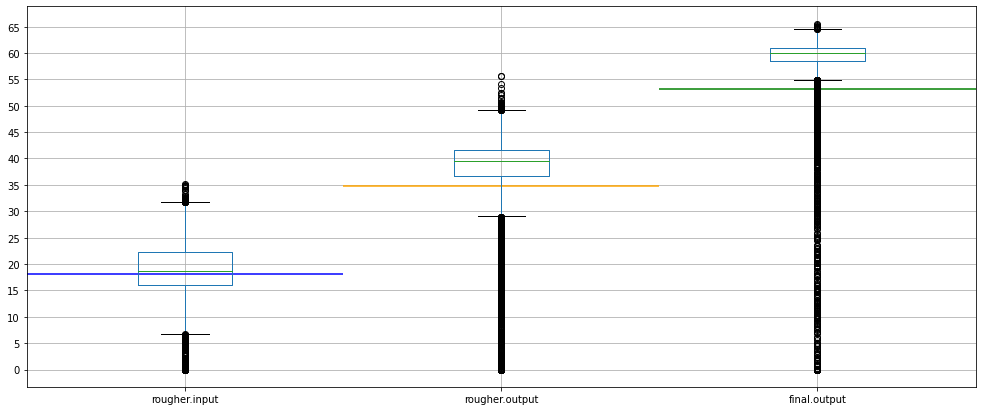

In [23]:
train_ffill.boxplot(['rougher.input', 'rougher.output', 'final.output'], figsize = (17,7))
plt.yticks(np.arange(0, 91, 5))
# Promedio de las entradas del proceso Rougher en azul
plt.hlines(train_ffill['rougher.input'].mean(),xmin=0.5,xmax=1.5, colors='blue')
# Promedio de las salidas del proceso Rougher en naranja
plt.hlines(train_ffill['rougher.output'].mean(),xmin=1.5,xmax=2.5, colors='orange')
# Promedio de las salidas del proceso final en verde
plt.hlines(train_ffill['final.output'].mean(),xmin=2.5,xmax=3.5, colors='green')
plt.show()

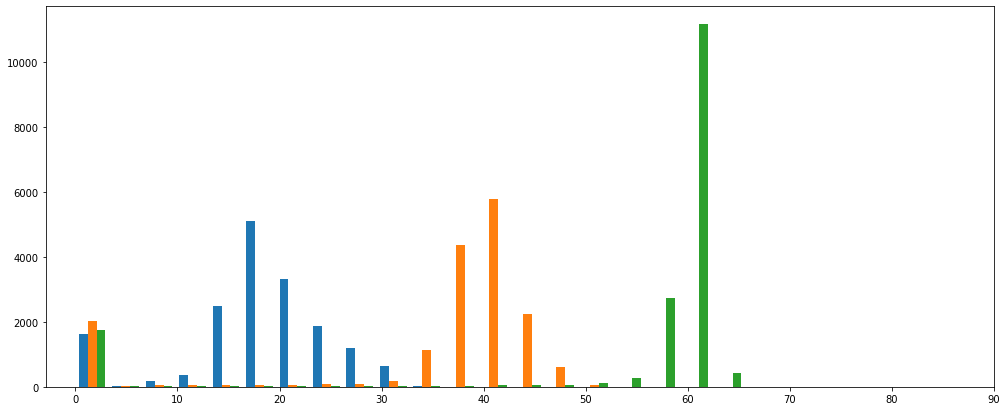

In [24]:
plt.figure(figsize=(17,7))
plt.hist([train_ffill['rougher.input'], train_ffill['rougher.output'], train_ffill['final.output']], bins=20)
plt.xticks(np.arange(0,91,10))
plt.show()

**Conclusiones**

Podemos observar en nuestros gráficos que en efecto tenemos valores atípicos en nuestras distribuciones. Con esto respondemos la primera pregunta. 

Con respecto a la segunda pregunta, podríamos eliminar los valores atípicos. Sin embargo, al hacerlo perderíamos mucha información. Por esta razón no eliminaremos los datos atípicos encontrados. 

## Construcion de Modelos

Antes de crear los modelos vamos a preparar nuestros datos. Para esto:
- Crearemos los faetures y targets para el conjunto de entrenamiento y de prueba. 
- Crearemos la función SMAPE.
- Crearemos nuestros modelos y escogeremos al mejor. 


In [25]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = ['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au']

test_date = test_ffill['date'] 

test_targets = full_ffill[full_ffill['date'].isin(test_date)] 

test_targets = test_targets.loc[:,targets] 

test_features = test_ffill.loc[:,features]

train_features = train_ffill.loc[:,features]

train_targets = train_ffill.loc[:,targets]

print(test_targets.shape) 
print(test_features.shape) 
print(train_targets.shape) 
print(train_features.shape) 

(5856, 2)
(5856, 10)
(16860, 2)
(16860, 10)


Como pueden observar hemos limitado los features a tan solo las columnas de input y los targets a dos de todas las columnas de output. 

In [26]:
def smape_(y, y_pred):

    n = len(y)
    abs_y = abs(y)
    abs_y_pred = abs(y_pred)
    abs_diff = abs(y - y_pred)

    return 100*(2/n) * np.nansum(abs_diff / (abs_y + abs_y_pred))

def smape_final(y, y_pred):

    pred_target_1 = y_pred[:, 0]
    pred_target_2 = y_pred[:, 1]

    rougher_smape = smape_(y.iloc[:, 0], pred_target_1)
    final_smape = smape_(y.iloc[:, 1], pred_target_2)

    return 0.25*rougher_smape + 0.75*final_smape

smape_scorer = make_scorer(smape_final, greater_is_better=False)

### Arbol de decision

In [27]:
param_grid = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11],
    'min_samples_split':[2,3,4,5,6]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state = 54321), param_grid=param_grid, cv=5,
    n_jobs=-1, scoring=smape_scorer)

grid_search.fit(train_features, train_targets)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(test_features)

print(best_model)
print(best_params)
print(best_score)

DecisionTreeRegressor(max_depth=4, random_state=54321)
{'max_depth': 4, 'min_samples_split': 2}
-14.89766961091733


### Bosque Aleatorio

In [28]:
param_grid = {
    'max_depth':[3,4,5,6,7,8,9,10,11],
    'min_samples_split':[3,4,5,6,7]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state = 54321), param_grid=param_grid, cv=5, scoring=smape_scorer)

grid_search.fit(train_features, train_targets)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(test_features)

print(best_model)
print(best_params)
print(best_score)

RandomForestRegressor(max_depth=4, min_samples_split=4, random_state=54321)
{'max_depth': 4, 'min_samples_split': 4}
-14.65520890473699


### Regresion Lineal


In [36]:
model = LinearRegression()
model.fit(train_features, train_targets)
predicted_valid = model.predict(test_features)
smape_final(test_targets, predicted_valid)

11.99200760479809

**Conclisiones**

-	Podemos ver que de los tres modelos entrenados el que tiene el score más bajo de smape es el árbol de decisión. 

## Conclusiones Generales

**Analisis Exploratorio**

- Los datasets train y full tiene las mismas columnas.
- El dataset test tiene 34 columnas menos que los otros datasets. Necesitamos analizar que columnas hacen falta en este dataset.
- Tenemos valores ausentes en varias columnas. Necesitamos decidir qué hacer con ellos. 
- El dataset full contiene todos los datos de train y test. 

**Duplicados**

- No encontramos dulicados 

**Valores Ausentes**

- Econtramos valores ausentes en 85 de 87 columnas.
- Los valores ausentes eran superiores al 20% de nuestros datos.
- Decidismos remplazarlos usando el metodo ffill.

**Concentracion de metales por etapas**

- Vemos que la concentración de aumenta a medida que pasa todos los procesos. 
- La cantidad de plata disminuye a medida que pasa los procesos.
- La cantidad de ploma también aumenta a medida que pasa cada proceso. 

**Analisis de distribuciones**

- Las differencias entre los graficos fueron minimas. 
- Concluimos que no necestabamos hacer mas cambios. 

**Concentracion total de substacias**

- Encontramos valores anormales en las concentraciones totales de substancias.
- Decidimos no elimarlas ya que representaban un porcentaje bastante elevado de nuestros datos. 

**Modelos**
- Construimos tres diferentes modelos. 
